# Reproducing Lucid

Most of the image optimization visualizations supported in the `optim` submodule were adopted from the [`lucid`](https://github.com/tensorflow/lucid) library, which was co-authored by [Christopher Olah](https://github.com/colah), [Ludwig Schubert](https://github.com/ludwigschubert), [Alexander Mordvintsev](https://github.com/znah) and many other contributors.

This also means that you can now do `lucid`-style visualizations with your PyTorch models!

This notebook shows how to reproduce some of the functionality from the Tensorflow-based `lucid` using PyTorch-based `captum.optim`. Specifically, we touch on basic visualizations, before going into transformation robustness and parameterizations, all using examples that can also be found in the Lucid notebooks.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision

import captum.optim as opt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## GoogLeNet

The original [Lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) is based on the `InceptionV1` model, also known as GoogLeNet. The same model is also available via `captum.optim.models.googlenet`.

In [2]:
from captum.optim.models import googlenet

model = googlenet(pretrained=True).to(device)

## Basic Visualizations

We can visualize the same "artsy" neuron, referred to as "mixed4a_pre_relu:476" in the original Lucid notebook.

  0%|          | 0/256 [00:00<?, ? step/s]

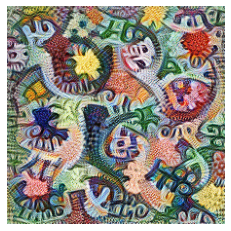

In [3]:
obj = opt.InputOptimization(
    model,
    opt.loss.ChannelActivation(model.mixed4a, 476),
)
obj.optimize()

obj.input_param().show()

And also the same "gemstone-like" neuron, referred to as "mixed4a_pre_relu:465" in the original Lucid notebook.

  0%|          | 0/256 [00:00<?, ? step/s]

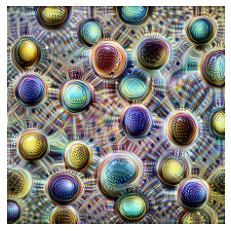

In [4]:
obj = opt.InputOptimization(
    model,
    opt.loss.ChannelActivation(model.mixed4a, 465),
)
obj.optimize()

obj.input_param().show()

The Lucid notebook also demonstrated addition of the previous two loss functions, which we can do here too!

  0%|          | 0/256 [00:00<?, ? step/s]

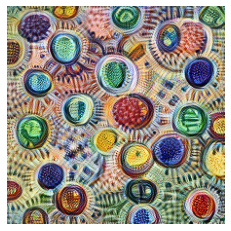

In [5]:
obj = opt.InputOptimization(
    model,
    sum([
        opt.loss.ChannelActivation(model.mixed4a, 476),
        opt.loss.ChannelActivation(model.mixed4a, 465),
    ]),
)
obj.optimize()

obj.input_param().show()

## Transformation Robustness

With `captum.optim`, we can also demonstrate the effect of transformation robustness on the visualizations.

Here we see that removing the default transforms results in high-frequency artifacts in the visualization.

  0%|          | 0/256 [00:00<?, ? step/s]

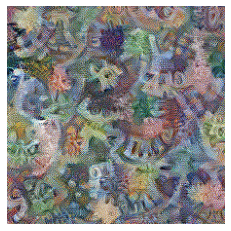

In [6]:
obj = opt.InputOptimization(
    model,
    opt.loss.ChannelActivation(model.mixed4a, 476),
    # Overwrite default transforms with identity i.e. no transforms
    transform=torch.nn.Sequential(torch.nn.Identity())
)
obj.optimize()

obj.input_param().show()

## Parameterizations

Another variable we can tune is the use of different parameterizations.

  0%|          | 0/256 [00:00<?, ? step/s]

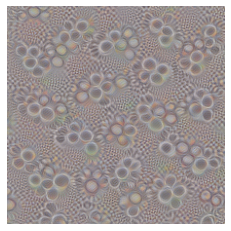

In [7]:
# Using PixelImage results in poorer visualizations
obj = opt.InputOptimization(
    model,
    opt.loss.ChannelActivation(model.mixed4a, 2),
    opt.images.NaturalImage(
        (224, 224),
        parameterization=opt.images.PixelImage
    ).to(device)
)
obj.optimize()

obj.input_param().show()

  0%|          | 0/256 [00:00<?, ? step/s]

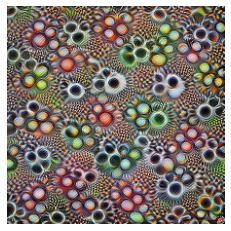

In [8]:
# Using FFTImage (the default option) often gives better results
obj = opt.InputOptimization(
    model,
    opt.loss.ChannelActivation(model.mixed4a, 2),
    opt.images.NaturalImage(
        (224, 224),
        parameterization=opt.images.FFTImage
    ).to(device)
)
obj.optimize()

obj.input_param().show()